In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv(r'C:\Users\lenovo\Desktop\Notebooks\DATA\cluster_two_blobs.csv')

In [4]:
two_blobs_outliers = pd.read_csv(r'C:\Users\lenovo\Desktop\Notebooks\DATA\cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

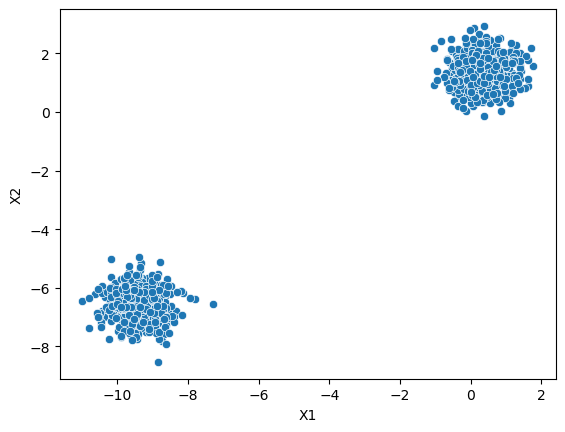

In [5]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

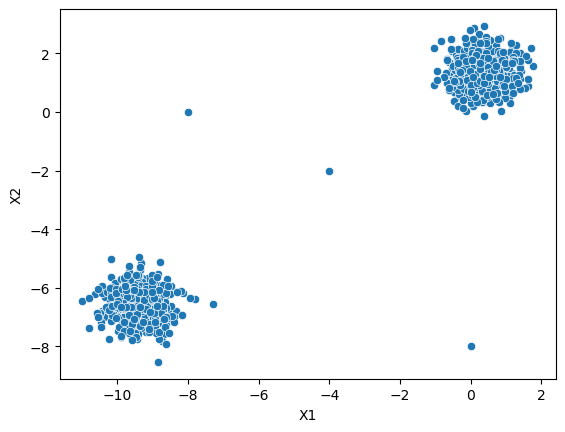

In [6]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

In [7]:
from sklearn.cluster import DBSCAN

In [41]:
dbscan = DBSCAN(eps=0.75)

In [42]:
labels = dbscan.fit_predict(two_blobs_outliers)

<Axes: xlabel='X1', ylabel='X2'>

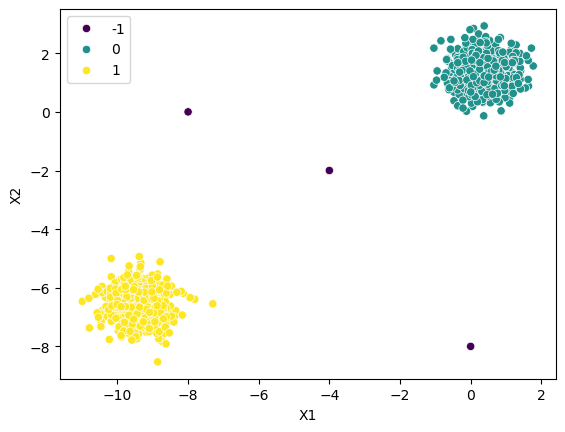

In [43]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2',hue=labels,palette='viridis')

In [16]:
np.sum(dbscan.labels_ == -1)

3

In [19]:
len(dbscan.labels_)

1000

In [18]:
(100*np.sum(dbscan.labels_ == -1)) / len(dbscan.labels_)

0.3

# EPS :

In [25]:
outlier_percent = []
number_outliers = []
for eps in np.linspace(0.001,10,100):
    model = DBSCAN(eps=eps)    
    model.fit(two_blobs_outliers)
    labels = model.labels_
    number_outliers.append(np.sum(model.labels_ == -1))
    outlier_percent.append((100*np.sum(model.labels_ == -1)) / len(dbscan.labels_))

<Axes: >

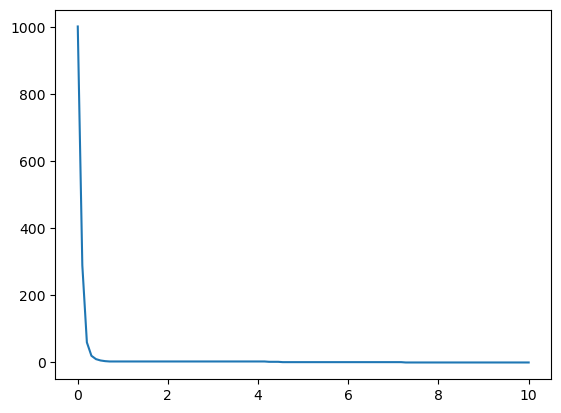

In [26]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_outliers)

(0.0, 4.5)

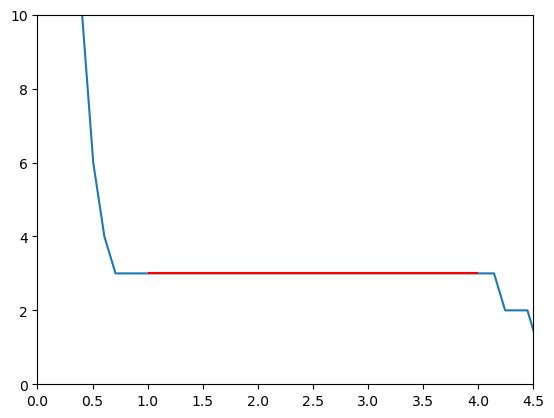

In [32]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_outliers)
plt.hlines(y=3,xmin=1,xmax=4,colors='red')
plt.ylim(0,10)
plt.xlim(0,4.5)

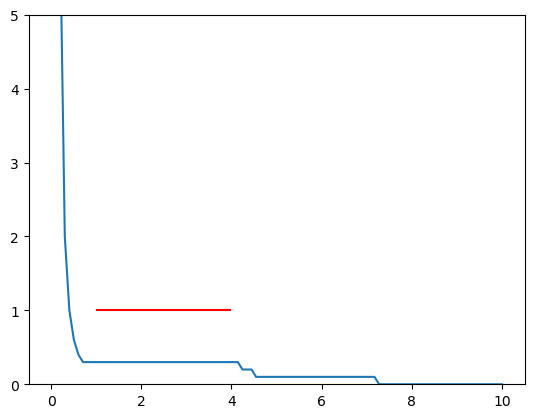

In [48]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylim(0,5)
plt.hlines(y=1,xmin=1,xmax=4,colors='red')

# Min_Samples :

In [49]:
# this the same thing just turn the hyperparameter